In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.1.0'

# 목차
- 어떻게 텐서플로우가 동작하는지 이해
- variable과 tensor 선언하기
- placeholder와 variable 사용하기
- 행렬을 이용한 작업
- 연산(operation)을 선언하기
- 활성화 함수(activation function) 구현
- 데이터 소스로부터 작업하기
- 추가적인 데이터 리소스에 대한 지식

## computational graph??

In [3]:
import scipy

In [4]:
scipy.__version__

'1.4.1'

tensor는 텐서플로우가 computational graph에서의 연산에 사용하는 주요 데이터 구조이다. 이러한 텐서를 변수로 혹은 placeholder로 변수를 입력받게 하는 방식으로 선언할 수 있다.

tensor는 일반화된 벡터나 행렬을 가리키는 수학적 용어이다. (n-dimensional)

# 1. Fixed tensors

In [8]:
# row_dim과 col_dim은 임의로 3,4로 지정
row_dim = 3
col_dim = 4

# zero_filled
tf.zeros([row_dim,col_dim])

<tf.Tensor 'zeros_1:0' shape=(3, 4) dtype=float32>

In [24]:
# one_filled
# .eval 이후는 numpy ndarray로의 변환
tf.ones([row_dim,col_dim]).eval(session=tf.compat.v1.Session())

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [23]:
# 한가지 실수로 채워넣기
tf.fill([row_dim,col_dim],42).eval(session=tf.compat.v1.Session())

array([[42, 42, 42, 42],
       [42, 42, 42, 42],
       [42, 42, 42, 42]])

In [26]:
tf.constant([1,2,3]).eval(session=tf.Session())

array([1, 2, 3])

In [35]:
# 같은 모양으로 그리기(넘파이와 거의 똑같음)
tf.zeros_like(tf.ones([row_dim,col_dim])).eval(session=tf.Session())

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

### 수열형의 텐서

In [44]:
# start와 stop의 입력시 float32등 숫자형 일치시키기

# np.linspae
tf.linspace(start=0.0,stop=1.0,num=10).eval(session=tf.Session())

array([0.        , 0.11111111, 0.22222222, 0.33333334, 0.44444445,
       0.5555556 , 0.6666667 , 0.7777778 , 0.8888889 , 1.        ],
      dtype=float32)

In [46]:
# np.arange, 마찬가지로 limit value는 포함하지 않음
tf.range(start=6,limit=15,delta=3).eval(session=tf.Session())

array([ 6,  9, 12])

In [48]:
# random tensors : 균등분포, maxval은 포함하지 않음
tf.random_uniform([5,6],minval=3,maxval=7).eval(session=tf.Session())

array([[4.3961215, 3.0063372, 6.2001805, 6.6501245, 3.4738169, 6.538987 ],
       [4.9947004, 6.999621 , 6.322201 , 3.9658976, 6.678405 , 6.7363205],
       [5.7357764, 3.556116 , 6.066332 , 5.2297235, 6.2499537, 5.736044 ],
       [6.138161 , 4.93826  , 6.0576644, 6.6783338, 5.8296943, 6.9140005],
       [3.9436488, 6.8203554, 4.6164513, 5.3022976, 3.8386493, 5.7699113]],
      dtype=float32)

In [50]:
# 정규분포
a = tf.random_normal([3,4],mean=0.0,stddev=1.0).eval(session=tf.Session())
a

array([[-0.25134802,  0.5084948 , -0.37794843,  0.669408  ],
       [-0.7183273 , -0.40160498, -1.383239  , -1.5141692 ],
       [ 0.44382015,  0.02938556, -0.07745433, -1.3333354 ]],
      dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

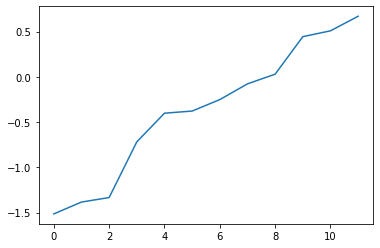

In [69]:
plt.figure()
plt.plot(np.sort(a.ravel()))
plt.show()

In [124]:
# 특정 범위를 넘어가지 않도록 추출
a = tf.truncated_normal([3,4],mean=0.0,stddev=1.0)

In [128]:
# a에는 연산 자체가 저장된 것이기 때문에 실행할 때마다 출력되는 값은 바뀐다.
a.eval(session=tf.Session())

array([[-0.21813223, -0.06844778, -0.83623564,  0.12293678],
       [-0.64290786, -1.6388993 , -0.33893353, -0.9748463 ],
       [-0.34337524, -0.2738293 , -1.582459  ,  0.6101997 ]],
      dtype=float32)

In [90]:
tf.random_shuffle(a)

<tf.Tensor 'RandomShuffle_2:0' shape=(3, 4) dtype=float32>

In [127]:
a.eval(session=tf.Session())

array([[ 1.4250612 ,  1.0004096 ,  0.04918485, -0.42009258],
       [-0.5157017 ,  0.26853025,  0.7740727 ,  1.6220611 ],
       [ 0.944217  ,  0.3857075 , -0.01823856, -0.5555014 ]],
      dtype=float32)

In [100]:
# random_shuffle은 무작위로 섞는 함수
b = tf.constant([1,2,3,4])
b.eval(session=tf.Session())

array([1, 2, 3, 4])

In [101]:
tf.random_shuffle(b).eval(session=tf.Session())

array([2, 3, 1, 4])

In [102]:
b.eval(session=tf.Session())

array([1, 2, 3, 4])

In [118]:
# 지정한 사이즈만큼만 추출, 순서는 바뀌지 않는듯
tf.random_crop(b,size = [2]).eval(session=tf.Session())

array([3, 4])

In [114]:
tf.random_crop(tf.random_shuffle(b),size = [2]).eval(session=tf.Session())

array([3, 2])

In [121]:
a = tf.random_normal([15],mean=0.0,stddev=1.0)
a.eval(session=tf.Session())


array([ 0.08337564,  1.2965627 , -1.9087688 , -0.04520847,  0.81096053,
        0.6169037 , -0.57745504, -0.4884011 , -1.290058  , -0.971127  ,
       -0.55146724, -2.4092832 ,  0.800579  ,  0.5222268 ,  0.08332071],
      dtype=float32)

In [123]:
tf.random_crop(a,size=[5]).eval(session=tf.Session())

array([-0.3082119 , -0.6461586 ,  1.640089  , -1.7608972 ,  0.60581094],
      dtype=float32)

In [132]:
tf.Variable(tf.zeros([3,4]))

<tf.Variable 'Variable_2:0' shape=(3, 4) dtype=float32_ref>

In [136]:
tf.convert_to_tensor(np.arange(10,20,5)).eval(session=tf.Session())

array([10, 15])

# placeholder와 variable
데이터를 만들때 가장 중요한 구분은 데이터가 placeholder인지 variable인지 구분하는 것이다.<br>
Variable은 알고리즘의 모델 파라미터로서 텐서플로우는 알고리즘에 최적화시키기 위해 variable이 변화하는 것을 keep track한다.<br>
Placeholder는 특정 타입과 shape의 데이터를 feed in 하도록 하거나 computational graph의 결과에 의존하는 오브젝트이다. 가령 expected outcome of a computation

constant는 변하지 않는 상수 생성<br>
variable은 값이 바뀔 수 있는 변수 생성<br>
placeholder는 일정 값을 받을 수 있는 그릇을 생성. feed_dict={x='들어갈 값'}과 같은 식을 지정

In [155]:
# variable 만들기
my_var = tf.Variable(tf.random_normal([2,2]))
sess = tf.Session()
# 초기화 실행
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)
sess.run(my_var)

array([[ 0.3461583 ,  0.86342144],
       [-0.24850059,  0.40374428]], dtype=float32)

In [157]:
# 현재 sess에는 my_var(정규분포에서 2x2 배열을 추출하는 연산)이 다음과 같은 연산으로 고정되어 있다.
sess.run(my_var)

array([[ 0.3461583 ,  0.86342144],
       [-0.24850059,  0.40374428]], dtype=float32)

In [158]:
# 연산이 고정되어 있기 때문에 여러번 시행해도 마찬가지 결과
sess.run(my_var)

array([[ 0.3461583 ,  0.86342144],
       [-0.24850059,  0.40374428]], dtype=float32)

In [159]:
# placeholder
sess = tf.Session()
x = tf.placeholder(tf.float32,shape=[2,2])
# idenetity는 입력받은 tensor와 똑같은 값, 모양으로 돌려준다.
y = tf.identity(x)

In [168]:
a = tf.linspace(-5.0,5.0,10)
a.eval(session=tf.Session())

array([-5.        , -3.8888888 , -2.7777777 , -1.6666665 , -0.55555534,
        0.5555558 ,  1.666667  ,  2.7777781 ,  3.8888893 ,  5.        ],
      dtype=float32)

In [169]:
bb = tf.identity(a)

In [170]:
bb.eval(session=tf.Session())

array([-5.        , -3.8888888 , -2.7777777 , -1.6666665 , -0.55555534,
        0.5555558 ,  1.666667  ,  2.7777781 ,  3.8888893 ,  5.        ],
      dtype=float32)

In [184]:
# placeholder, placeholder로 정의된 x에 데이터를 feed in 시켜서 y로 정의한 연산을 수행
sess = tf.Session()
x = tf.placeholder(tf.float32,shape=[2,2])
y = tf.identity(x)
x_vals = np.random.rand(2,2)
# sess.run(x,feed_dict={x:x_vals})하면 self-referencing error가 발생
print(sess.run(y,feed_dict={x:x_vals}))

[[0.9626578  0.61157995]
 [0.92176723 0.11649749]]


In [183]:
input_data = [1,2,3]
x=tf.placeholder(dtype=tf.float32)
y=x*2
sess = tf.Session()
print(sess.run(y,feed_dict={x:input_data}))

[2. 4. 6.]


In [ ]:
# more
# global_variables_initializer()는 전역적인 변수의 초기화
# 만일 하나하나의 변수를 초기화하고 싶다면 다음과 같이 하면 된다.
sess = tf.Session()
first_var = tf.Variable(tf.zeros([2,3]))
sess.run(first_var.initializer)

second_var = tf.Variable(tf.zeros_like(first_var))
sess.run(second_var.initializer)

# Working with Matrices

In [ ]:
sess = tf.Session()
identity_matrix = tf.diag([1.0,1.0,1.0])
A = tf.truncated_normal([2,3])
B = tf.fill([2,3],5.0)
C = tf.random_uniform([3,2])
D = tf.convert_to_tensor(np.array([[1.,2.,3.],[-3.,-7.,-1.],[0.,5.,-2]]))

In [2]:
print(sess.run(identity_matrix))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
# 실행할 때마다 바뀌는 것은 당연
print(sess.run(A))

[[-0.38777488 -0.3534439   0.26380745]
 [-0.41740763  0.22589749  1.9215368 ]]


In [189]:
sess.run(B)

array([[5., 5., 5.],
       [5., 5., 5.]], dtype=float32)

In [190]:
sess.run(C)

array([[0.53742945, 0.44842672],
       [0.45616376, 0.79423213],
       [0.7733774 , 0.07006311]], dtype=float32)

In [191]:
sess.run(D)

array([[ 1.,  2.,  3.],
       [-3., -7., -1.],
       [ 0.,  5., -2.]])

## 행렬 연산

In [194]:
# A가 새로 실행되므로 위의 결과를 더한 것과는 값이 다를 수 있다.
sess.run(A+B)

array([[6.136733 , 3.3192015, 3.4051886],
       [3.9672287, 3.0563953, 4.3515034]], dtype=float32)

In [195]:
sess.run(B-B)

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [196]:
sess.run(A-A)

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [197]:
sess.run(tf.matmul(B,identity_matrix))

array([[5., 5., 5.],
       [5., 5., 5.]], dtype=float32)

In [198]:
sess.run(tf.transpose(C))

array([[0.592121  , 0.5631949 , 0.38090456],
       [0.7576839 , 0.8206432 , 0.12021339]], dtype=float32)

In [200]:
sess.run(tf.matrix_determinant(D))

-37.99999999999999

In [202]:
sess.run(tf.matrix_inverse(D))

array([[-0.5       , -0.5       , -0.5       ],
       [ 0.15789474,  0.05263158,  0.21052632],
       [ 0.39473684,  0.13157895,  0.02631579]])

In [205]:
sess.run(tf.matmul(tf.matrix_inverse(D),D)).round(2)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0., -0.,  1.]])

In [209]:
# Decomposition
sess.run(tf.cholesky(identity_matrix))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [4]:
# eigenvalues와 eigenvectors
val,vec = sess.run(tf.self_adjoint_eig(D))
print(val,'\n\n',vec)

[-10.65907521  -0.22750691   2.88658212] 

 [[ 0.21749542  0.63250104 -0.74339638]
 [ 0.84526515  0.2587998   0.46749277]
 [-0.4880805   0.73004459  0.47834331]]


In [15]:
sess.run(tf.matmul(tf.matmul(np.linalg.inv(vec),D),vec))

array([[-7.58298993, -2.94470458, -1.60546146],
       [ 2.50491195,  0.84259831,  1.64333533],
       [-0.6842788 , -4.63783512, -1.25960838]])

In [18]:
D_ = D.eval(session=tf.Session())

In [22]:
D_.dot(vec[:,0])

array([ 0.44378422, -6.08126179,  5.20248674])

In [23]:
val[0]*vec[:,0]

array([-2.31830003, -9.00974478,  5.20248674])

In [21]:
np.linalg.inv(vec).dot(D_).dot(vec)

array([[-7.58298993, -2.94470458, -1.60546146],
       [ 2.50491195,  0.84259831,  1.64333533],
       [-0.6842788 , -4.63783512, -1.25960838]])

In [24]:
A = np.array([[-2,0,-6],[0,1,0],[-4,1,0]])
val,vec = np.linalg.eig(A)
print(val,'\n',vec)

[-6.  4.  1.] 
 [[-0.83205029  0.70710678  0.27216553]
 [ 0.          0.          0.95257934]
 [-0.5547002  -0.70710678 -0.13608276]]


In [25]:
A.dot(vec[:,0])-val[0]*vec[:,0]

array([0., 0., 0.])

In [27]:
np.linalg.inv(vec).dot(A).dot(vec)

array([[-6.00000000e+00,  1.17548426e-17, -6.40075651e-19],
       [-5.40474046e-17,  4.00000000e+00, -2.48790184e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [37]:
D = tf.convert_to_tensor(np.array([[-2.,0.,-6.],[0.,1.,0.],[-4.,1.,0.]]))
val,vec = sess.run(tf.self_adjoint_eig(D))
print(val,'\n\n',vec)

[-5.18508811  0.79690133  3.38818677] 

 [[-0.77835195 -0.27377545 -0.56499137]
 [ 0.10020551 -0.94255041  0.318681  ]
 [-0.61977988  0.19143073  0.76106975]]


In [34]:
val,vec = sess.run(tf.self_adjoint_eig(A.astype(np.float32)))
print(val,'\n\n',vec)

[-5.1850886  0.7969014  3.3881881] 

 [[ 0.77835196  0.27377543 -0.5649914 ]
 [-0.10020552  0.9425504   0.31868106]
 [ 0.61977994 -0.19143075  0.7610699 ]]


In [39]:
sess.run(tf.matmul(tf.matmul(np.linalg.inv(vec),D),vec))

array([[-6.08779651,  0.27881855,  1.10849687],
       [-0.92353482,  1.08215252,  1.13407104],
       [-0.50282849,  0.15530809,  4.00564399]])

# Declaring operations
사칙연산 : add,sub,mul,div


In [295]:
# div는 input과 같은 타입의 결과물을 반환한다.
# truediv는 input의 타입과 관계없음
print(sess.run(tf.div(3,4)))
print(sess.run(tf.truediv(3,4)))

0
0.75


In [296]:
print(sess.run(tf.div(3.,4.)))

0.75


In [297]:
# 가장 가까운 정수로 내림(가우스 함수)(정수부분)(몫)
sess.run(tf.floordiv(3.0,4.0))

0.0

In [298]:
sess.run(tf.floordiv(-3.0,4.0))

-1.0

In [299]:
# 나머지를 반환
sess.run(tf.mod(22.0,5.0))

2.0

In [301]:
# 외적(cross_product)
sess.run(tf.cross([1.,0.,0.],[0.,1.,0.]))

array([0., 0., 1.], dtype=float32)

In [302]:
a = tf.abs(-3)

In [303]:
a

<tf.Tensor 'Abs:0' shape=() dtype=int32>

In [304]:
sess.run(a)

3

In [306]:
sess.run(tf.tan(np.pi/4.))

1.0

In [308]:
def custom_polynomial(value):
    return 3*tf.square(value)-value+10
sess.run(custom_polynomial(11))

362

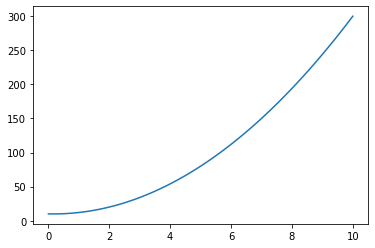

In [311]:
x_list = np.linspace(0,10,100)
y_list =[]
for x in x_list:
    y_list.append(sess.run(custom_polynomial(x)))
plt.plot(x_list,y_list)

# Implementing activation functions
신경망이 비선형 출력으로 근사화시키는 역할

텐서플로우에서는 nn 라이브러리를 통해 활성화 함수를 제공한다. 내장된 활성화 함수에 더해서 사용자 정의 함수를 만들어 사용할 수도 있다.

In [2]:
sess = tf.Session()

In [3]:
sess.run(tf.nn.relu([-3,3,10]))

array([ 0,  3, 10])

In [4]:
# min(max(0,x),6)
sess.run(tf.nn.relu6([-3,3,10]))

array([0, 3, 6])

In [6]:
# sigmoid : 정수가 아닌 실수형으로 입력해야한다. 0~1
sess.run(tf.nn.sigmoid([-1.,0.,1.]))

array([0.26894143, 0.5       , 0.7310586 ], dtype=float32)

In [8]:
# tanh : -1~1
sess.run(tf.nn.tanh([-1.,0.,1.]))

array([-0.7615942,  0.       ,  0.7615942], dtype=float32)

In [9]:
# softsign(x) = x/(|x|+1) : continuos하지만 smooth하지는 않다.
sess.run(tf.nn.softsign([-1.,0.,1.]))

array([-0.5,  0. ,  0.5], dtype=float32)

In [10]:
#softplus : log(exp(x)+1)
sess.run(tf.nn.softplus([-1.,0.,1.]))

array([0.31326166, 0.6931472 , 1.3132616 ], dtype=float32)

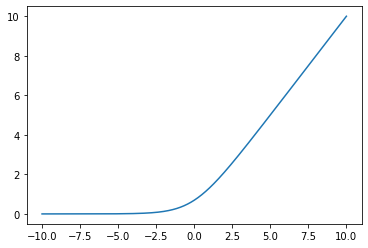

In [11]:
x_array = np.linspace(-10,10,1000)
y_array = np.log(np.exp(x_array)+1)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_array,y_array)

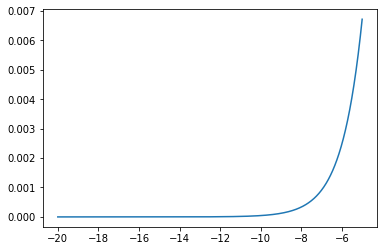

In [13]:
x_array = np.linspace(-20,-5,1000)
y_array = np.log(np.exp(x_array)+1)
plt.plot(x_array,y_array)

softplus함수는 ReLU 함수의 smooth 버전이다. x가 커질때 softplus함수는 발산하지만 softsign함수는 1을 향한다. <br>
x가 음의 무한대에 가까워질 때 softplus함수는 0에 가까워지지만 softsign함수는 -1을 향한다.

In [14]:
# elu(exponential linear unit) : exp(x)+1 if x<0, x if x>0
sess.run(tf.nn.elu([-1.,0.,1.]))

array([-0.63212055,  0.        ,  1.        ], dtype=float32)

이러한 활성화 함수들은 신경망에서의 비선형성을 도입하는 방법이다.

(-1, 7)

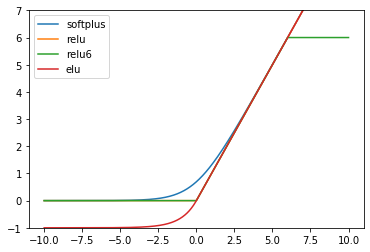

In [20]:
plt.figure()

x_array = np.linspace(-10,10,1000)

y_softplus = np.log(np.exp(x_array)+1)

y_relu = sess.run(tf.nn.relu(x_array))

y_relu6 = sess.run(tf.nn.relu6(x_array))

y_elu = sess.run(tf.nn.elu(x_array))

plt.plot(x_array,y_softplus,label='softplus')
plt.plot(x_array,y_relu,label='relu')
plt.plot(x_array,y_relu6,label='relu6')
plt.plot(x_array,y_elu,label='elu')
plt.legend()
plt.ylim(-1,7)

(-2, 2)

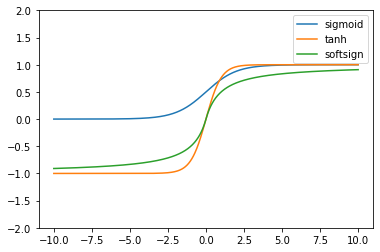

In [21]:
# smooth한 함수들
x_array = np.linspace(-10,10,1000)

y_sigmoid = sess.run(tf.nn.sigmoid(x_array))

y_tanh = sess.run(tf.nn.tanh(x_array))

y_softsign = sess.run(tf.nn.softsign(x_array))

plt.plot(x_array,y_sigmoid,label='sigmoid')
plt.plot(x_array,y_tanh,label='tanh')
plt.plot(x_array,y_softsign,label='softsign')
plt.legend()
plt.ylim(-2,2)

# working with data sources

In [22]:
# iris data
from sklearn.datasets import load_iris
iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[5.1 3.5 1.4 0.2]
{0, 1, 2}


In [25]:
# birth weight data
import requests
url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/\
birthweight_data/birthweight.dat'
birth_file = requests.get(url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
print(len(birth_data))
print(len(birth_data[0]))

189
9
